# Texture Inpainting

In [34]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Define the images
baseImagePath = r"../data\1c17cc67b8c747c3febad4f49b26ec52\fabric_full_gt_texture.png"
knownMaskMaterial1Path = r"../data\1c17cc67b8c747c3febad4f49b26ec52\fabric_25_existing_mask.png"
unknownMaskMaterial1Path = r"../data\1c17cc67b8c747c3febad4f49b26ec52\fabric_25_prediction_mask.png"
imageSize = (512,512)

# Preparing the examples
baseImage = cv2.resize(cv2.imread(baseImagePath),imageSize)

In [35]:
knownMask1 = cv2.resize(cv2.imread(knownMaskMaterial1Path,0),imageSize)
knownMask1[knownMask1>5] = 255 # Make sure the mask is pure white
knownMask1[knownMask1<5] = 0 # Make sure the mask is pure white
unknownMask1 = cv2.resize(cv2.imread(unknownMaskMaterial1Path,0),imageSize)
unknownMask1[unknownMask1>5] = 255 # Make sure the mask is pure white
unknownMask1[unknownMask1<5] = 0 # Make sure the mask is pure white

baseImageMasked = cv2.bitwise_and(baseImage,baseImage, mask= (knownMask1))

In [36]:
def show_images(maskedImg, fixedImg, gtImg, title = "Images"):
    plt.rcParams['figure.figsize'] = [15, 5]
    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(maskedImg, cv2.COLOR_BGR2RGB))
    plt.subplot(1, 3, 2)
    plt.title(title)
    plt.imshow(cv2.cvtColor(fixedImg, cv2.COLOR_BGR2RGB))
    plt.subplot(1, 3, 3)
    plt.imshow(cv2.cvtColor(gtImg, cv2.COLOR_BGR2RGB))
    plt.show()

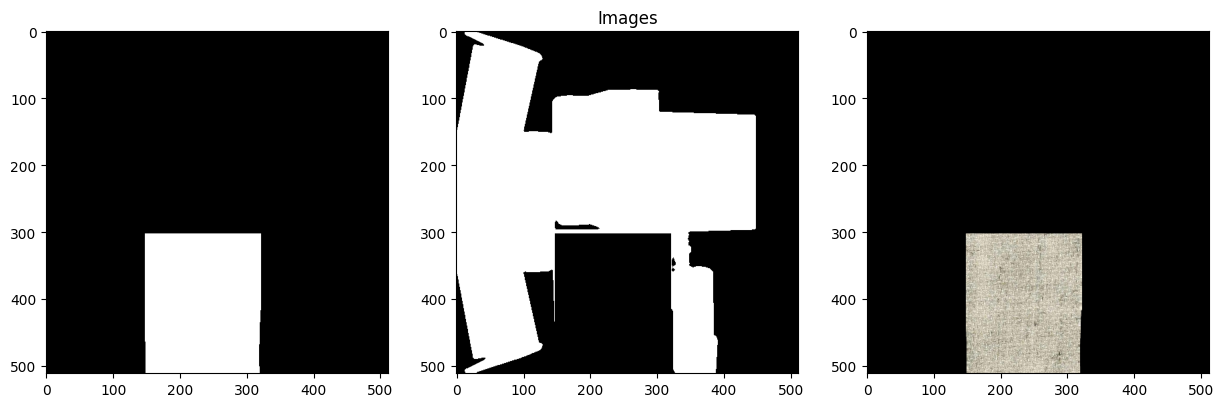

In [37]:
show_images(knownMask1, unknownMask1, baseImageMasked)

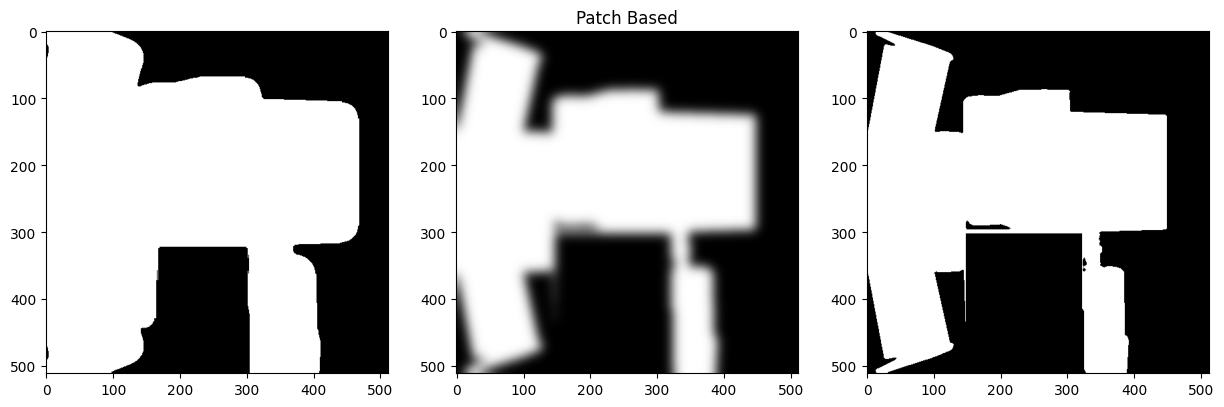

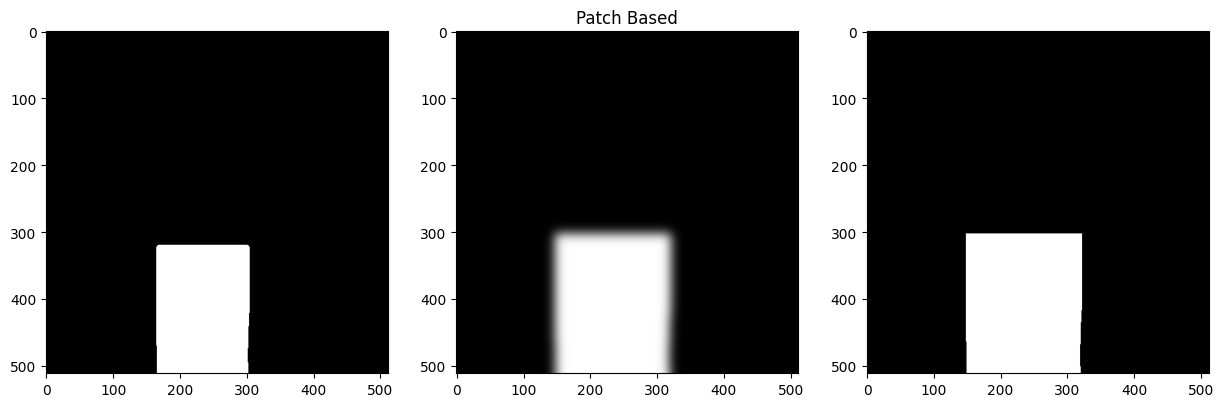

In [47]:
unknownMask1Blurred = cv2.GaussianBlur(unknownMask1, (51, 51), 0)
(T, unknownMask1Tres) = cv2.threshold(unknownMask1Blurred, 1, 255,cv2.THRESH_BINARY)
show_images(unknownMask1Tres, unknownMask1Blurred, unknownMask1, "Patch Based")

knownMask1Blurred = cv2.GaussianBlur(knownMask1, (51, 51), 0)
(T, knownMask1Tres) = cv2.threshold(knownMask1Blurred, 250, 255,cv2.THRESH_BINARY)
show_images(knownMask1Tres, knownMask1Blurred, knownMask1, "Patch Based")

In [50]:
# unconditional inpainting 
import patch_based_inpainting
import cv2

patch_size = 12
overlap_size = 5tensorboard --logdir experiments/YOUR_EXPERIMENT/summary/ --host 0.0.0.0
rotation = [0,45,90,135,180]

patcher = patch_based_inpainting.inpaint.Inpaint(baseImageMasked, unknownMask1Tres, patch_size, overlap_size, training_area=knownMask1Tres, window_step=None, mirror_hor=True, mirror_vert=True, rotation=None, method='gaussian')
fixedImage = patcher.resolve()
show_images(baseImageMasked, unknownMask1Tres, fixedImage, "Patch Based")

IndexError: boolean index did not match indexed array along dimension 0; dimension is 1034 but corresponding boolean dimension is 512

: 

In [9]:
cv2.imwrite(r"../data\1c17cc67b8c747c3febad4f49b26ec52" + "/fixedImage_50.png", fixedImage)

True